# Tarea 4. Midiendo rendimiento y riesgo en un portafolio.

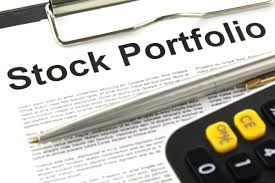

**Resumen.**
> En esta tarea, calcularás medidas de rendimiento esperado diario y volatilidad para cuatro diferentes portafolios. Usarás los históricos de precios que ya descargaste en la tarea anterior.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea4_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea4_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (20 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), Microsoft (MSFT), Walgreens (WBA), y Tesla Motors (TSLA) durante el periodo comprendido del primero de enero del 2011 hasta el 31 de diciembre del 2015.

1. Mostrar el DataFrame de los precios diarios (5 puntos).
2. Graficar los precios (5 puntos).
3. Mostrar el DataFrame de los rendimientos porcentuales diarios (5 puntos).
4. Graficar los rendimientos (5 puntos).

In [1]:
names= ['^GSPC','WBA','TSLA','MSFT']
start, end ='2011-01-01','2015-12-31'
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [2]:
dataframes = get_closes(tickers = names, start_date=start,end_date=end, freq='d')
dataframes

^GSPC        WBA        TSLA       MSFT
Date                                                     
2011-01-03  1271.869995  33.120098   26.620001  22.912699
2011-01-04  1270.199951  33.398075   26.670000  23.002779
2011-01-05  1276.560059  33.861340   26.830000  22.929071
2011-01-06  1273.849976  33.962425   27.879999  23.600565
2011-01-07  1271.500000  33.760262   28.240000  23.420408
2011-01-10  1269.750000  34.493088   28.450001  23.109228
2011-01-11  1274.479980  34.392010   26.959999  23.019156
2011-01-12  1285.959961  34.703655   26.959999  23.379471
2011-01-13  1283.760010  35.074276   26.219999  23.084660
2011-01-14  1293.239990  34.905807   25.750000  23.174734
2011-01-18  1295.020020  35.352238   25.639999  23.469542
2011-01-19  1281.920044  34.771057   24.030001  23.313950
2011-01-20  1280.260010  35.049011   22.620001  23.215685
2011-01-21  1283.349976  35.116390   23.040001  22.945452
2011-01-24  1290.839966  34.947945   24.490000  23.240253
2011-01-25  1291.180054  34.737358   24.680000  23.297577
2011-01-26  1296.630005  34.779480   24.750000  23.567814
2011-01-27  1299.540039  34.594166   24.920000  23.641508
2011-01-28  1276.339966  33.996117   24.010000  22.724344
2011-01-31  1286.119995  34.063499   24.100000  22.707973
2011-02-01  1307.589966  35.571247   23.910000  22.920885
2011-02-02  1304.030029  35.352238   23.940001  22.879940
2011-02-03  1307.099976  35.638630   23.629999  22.642462
2011-02-04  1310.869995  35.689178   23.459999  22.740723
2011-02-07  1319.050049  35.638630   23.070000  23.092848
2011-02-08  1324.569946  36.034534   24.490000  23.158361
2011-02-09  1320.880005  35.933468   23.209999  22.904507
2011-02-10  1321.869995  35.866074   23.219999  22.519625
2011-02-11  1329.150024  35.866074   23.250000  22.314898
2011-02-14  1332.319946  35.520729   23.080000  22.298523
...                 ...        ...         ...        ...
2015-11-18  2083.580078  79.943947  221.070007  50.612396
2015-11-19  2081.239990  78.289886  221.800003  50.696991
2015-11-20  2089.169922  77.344696  220.009995  50.931961
2015-11-23  2086.590088  77.420311  217.750000  50.931961
2015-11-24  2089.139893  78.384399  218.250000  50.988346
2015-11-25  2088.870117  78.828644  229.639999  50.462013
2015-11-27  2090.110107  79.565880  231.610001  50.687584
2015-11-30  2080.409912  79.424103  230.259995  51.082333
2015-12-01  2102.629883  79.386299  237.190002  51.900036
2015-12-02  2079.510010  78.743584  231.990005  51.890629
2015-12-03  2049.620117  77.448662  232.710007  50.941353
2015-12-04  2091.689941  79.981758  230.380005  52.548538
2015-12-07  2077.070068  80.218063  231.130005  52.454559
2015-12-08  2063.590088  79.074387  226.720001  52.435760
2015-12-09  2047.619995  78.771919  224.520004  51.674458
2015-12-10  2052.229980  78.847542  227.070007  51.947021
2015-12-11  2012.369995  77.231262  217.020004  50.809772
2015-12-14  2021.939941  78.034676  218.580002  51.824844
2015-12-15  2043.410034  77.609352  221.089996  51.881233
2015-12-16  2073.070068  80.066826  234.509995  52.755314
2015-12-17  2041.890015  78.771919  233.389999  52.351170
2015-12-18  2005.550049  77.987427  230.460007  50.875565
2015-12-21  2021.150024  80.236961  232.559998  51.533482
2015-12-22  2038.969971  81.295563  229.949997  52.022213
2015-12-23  2064.290039  81.333389  229.699997  52.463955
2015-12-24  2060.989990  81.720894  230.570007  52.322975
2015-12-28  2056.500000  81.134888  228.949997  52.586140
2015-12-29  2078.360107  82.061165  237.190002  53.150063
2015-12-30  2063.360107  81.654747  238.089996  52.924496
2015-12-31  2043.939941  80.492165  240.009995  52.144402

[1258 rows x 4 columns]

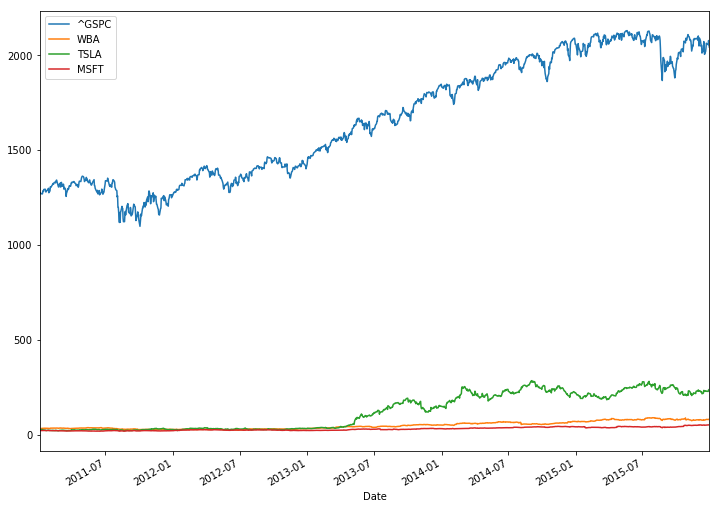

In [3]:
%matplotlib inline
dataframes.plot(figsize=(12,9));

In [16]:
rendimientos_diarios = ((dataframes-dataframes.shift())/(dataframes.shift())).dropna()
rendimientos_diarios1 = dataframes.pct_change().dropna()
rendimientos_diarios1

^GSPC       WBA      TSLA      MSFT
Date                                              
2011-01-04 -0.001313  0.008393  0.001878  0.003931
2011-01-05  0.005007  0.013871  0.005999 -0.003204
2011-01-06 -0.002123  0.002985  0.039135  0.029286
2011-01-07 -0.001845 -0.005953  0.012913 -0.007634
2011-01-10 -0.001376  0.021707  0.007436 -0.013287
2011-01-11  0.003725 -0.002930 -0.052373 -0.003898
2011-01-12  0.009008  0.009062  0.000000  0.015653
2011-01-13 -0.001711  0.010680 -0.027448 -0.012610
2011-01-14  0.007385 -0.004803 -0.017925  0.003902
2011-01-18  0.001376  0.012790 -0.004272  0.012721
2011-01-19 -0.010116 -0.016440 -0.062792 -0.006630
2011-01-20 -0.001295  0.007994 -0.058677 -0.004215
2011-01-21  0.002414  0.001922  0.018568 -0.011640
2011-01-24  0.005836 -0.004797  0.062934  0.012848
2011-01-25  0.000263 -0.006026  0.007758  0.002467
2011-01-26  0.004221  0.001213  0.002836  0.011599
2011-01-27  0.002244 -0.005328  0.006869  0.003127
2011-01-28 -0.017853 -0.017288 -0.036517 -0.038795
2011-01-31  0.007663  0.001982  0.003748 -0.000720
2011-02-01  0.016694  0.044263 -0.007884  0.009376
2011-02-02 -0.002723 -0.006157  0.001255 -0.001786
2011-02-03  0.002354  0.008101 -0.012949 -0.010379
2011-02-04  0.002884  0.001418 -0.007194  0.004340
2011-02-07  0.006240 -0.001416 -0.016624  0.015484
2011-02-08  0.004185  0.011109  0.061552  0.002837
2011-02-09 -0.002786 -0.002805 -0.052266 -0.010962
2011-02-10  0.000749 -0.001876  0.000431 -0.016804
2011-02-11  0.005507  0.000000  0.001292 -0.009091
2011-02-14  0.002385 -0.009629 -0.007312 -0.000734
2011-02-15 -0.003235  0.004031 -0.010399 -0.004064
...              ...       ...       ...       ...
2015-11-18  0.016162  0.019405  0.033037  0.016613
2015-11-19 -0.001123 -0.020690  0.003302  0.001671
2015-11-20  0.003810 -0.012073 -0.008070  0.004635
2015-11-23 -0.001235  0.000978 -0.010272  0.000000
2015-11-24  0.001222  0.012453  0.002296  0.001107
2015-11-25 -0.000129  0.005668  0.052188 -0.010323
2015-11-27  0.000594  0.009352  0.008579  0.004470
2015-11-30 -0.004641 -0.001782 -0.005829  0.007788
2015-12-01  0.010681 -0.000476  0.030096  0.016008
2015-12-02 -0.010996 -0.008096 -0.021923 -0.000181
2015-12-03 -0.014374 -0.016445  0.003104 -0.018294
2015-12-04  0.020526  0.032707 -0.010012  0.031550
2015-12-07 -0.006990  0.002954  0.003255 -0.001788
2015-12-08 -0.006490 -0.014257 -0.019080 -0.000358
2015-12-09 -0.007739 -0.003825 -0.009704 -0.014519
2015-12-10  0.002251  0.000960  0.011358  0.005275
2015-12-11 -0.019423 -0.020499 -0.044259 -0.021892
2015-12-14  0.004756  0.010403  0.007188  0.019978
2015-12-15  0.010619 -0.005450  0.011483  0.001088
2015-12-16  0.014515  0.031665  0.060699  0.016848
2015-12-17 -0.015041 -0.016173 -0.004776 -0.007661
2015-12-18 -0.017797 -0.009959 -0.012554 -0.028187
2015-12-21  0.007778  0.028845  0.009112  0.012932
2015-12-22  0.008817  0.013193 -0.011223  0.009484
2015-12-23  0.012418  0.000465 -0.001087  0.008491
2015-12-24 -0.001599  0.004764  0.003788 -0.002687
2015-12-28 -0.002179 -0.007171 -0.007026  0.005030
2015-12-29  0.010630  0.011417  0.035990  0.010724
2015-12-30 -0.007217 -0.004953  0.003794 -0.004244
2015-12-31 -0.009412 -0.014238  0.008064 -0.014740

[1257 rows x 4 columns]

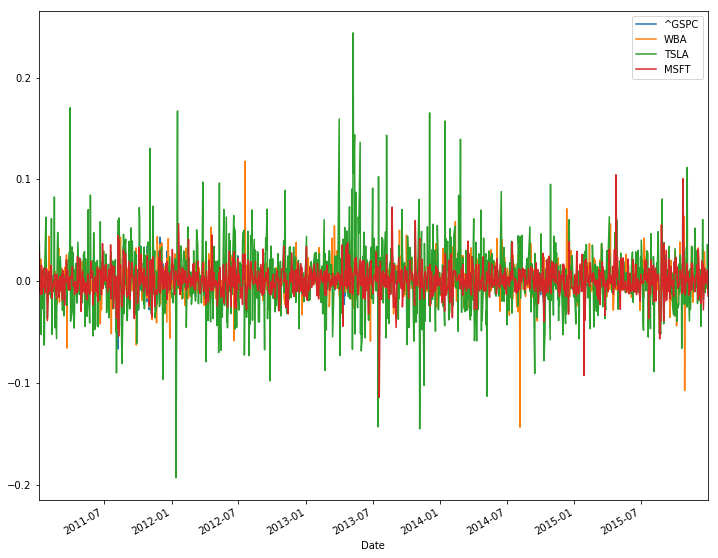

In [17]:
%matplotlib inline
rendimientos_diarios.plot(figsize=(12,10))

## 2. Rendimiento esperado y volatilidad para cada activo (30 puntos)

Usando los datos de rendimientos diarios de MSFT, WBA, y TSLA:

1. Reportar en un DataFrame el rendimiento esperado diario y la volatilidad diaria para cada activo. Reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada activo (10 puntos).
2. Calcular la matriz de varianza-covarianza (base diaria) para los activos MSFT, WBA, y TSLA (10 puntos).
3. Calcular la matriz de correlación (base diaria) para los activos MSFT, WBA, y TSLA (10 puntos).

In [18]:
import pandas as pd 
import numpy as np
rend_vola_diario = pd.DataFrame(columns = ['Rendimiento Diario','Volatilidad diaria'], index =['MSFT','WBA','TSLA'])
rend_vola_diario['Rendimiento Diario']= rendimientos_diarios.mean()
rend_vola_diario['Volatilidad diaria']= rendimientos_diarios.std()
rend_vola_diario

Rendimiento Diario  Volatilidad diaria
MSFT            0.000764            0.014799
WBA             0.000839            0.016246
TSLA            0.002296            0.033246

In [19]:
rend_vola_anual = pd.DataFrame(columns = ['Rendimiento Anual','Volatilidad Anual'], index =['MSFT','WBA','TSLA'])
rend_vola_anual['Rendimiento Anual']= rendimientos_diarios.mean()*252
rend_vola_anual['Volatilidad Anual']= rendimientos_diarios.std()*np.sqrt(252)
rend_vola_anual

Rendimiento Anual  Volatilidad Anual
MSFT           0.192464           0.234923
WBA            0.211496           0.257905
TSLA           0.578548           0.527757

# <Font color = red> Matriz de Covarianza y Correlación(Ambos base diaria).

In [23]:
#Rendimientos diarios
matriz_covarianza = rendimientos_diarios.cov()
matriz_covarianza

^GSPC       WBA      TSLA      MSFT
^GSPC  0.000095  0.000075  0.000124  0.000092
WBA    0.000075  0.000264  0.000083  0.000072
TSLA   0.000124  0.000083  0.001105  0.000120
MSFT   0.000092  0.000072  0.000120  0.000219

In [26]:
#Rendimientos dairios
matriz_correlacion = rendimientos_diarios.corr()
matriz_correlacion

^GSPC       WBA      TSLA      MSFT
^GSPC  1.000000  0.471245  0.383444  0.635636
WBA    0.471245  1.000000  0.153495  0.298437
TSLA   0.383444  0.153495  1.000000  0.243817
MSFT   0.635636  0.298437  0.243817  1.000000

## 3. Rentimiento esperado y volatilidad para portafolios (30 puntos)

1. Calcular los rendimientos diarios de los siguientes portafolios. Reportar en un DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior tratando cada portafolio como si fuera un activo individual (15 puntos).
 - Portafolio 1: igualmente ponderado entre MSFT, WBA, y TSLA.
 - Portafolio 2: 30% MSFT, 20% WBA, y 50% TSLA.
 - Portafolio 3: 50% MSFT, 30% WBA, y 20% TSLA.
 - Portafolio 4: 20% MSFT, 50% WBA, y 30% TSLA.
2. Para cada uno de los anteriores portafolios, reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior mediante las fórmulas de rendimiento esperado y volatilidad para portafolios derivadas en clase (10 puntos).
3. Comparar los resultados del punto uno con los del punto dos (5 puntos).

In [29]:
##Portafolios y sus respectivos rendimientos dirarios  por su ponderación 

portafolio_1 = (1/3)*rendimientos_diarios.WBA+(1/3)*rendimientos_diarios.TSLA+(1/3)*rendimientos_diarios.MSFT
portafolio_1
portafolio_2 = (.3)*rendimientos_diarios.WBA+(.2)*rendimientos_diarios.TSLA+(.5)*rendimientos_diarios.MSFT
portafolio_2
portafolio_3 = (.5)*rendimientos_diarios.WBA+(.3)*rendimientos_diarios.TSLA+(.2)*rendimientos_diarios.MSFT
portafolio_3
portafolio_4 = (.2)*rendimientos_diarios.WBA+(.5)*rendimientos_diarios.TSLA+(.3)*rendimientos_diarios.MSFT
portafolio_4
rendimientos_diarios['Portafolio1'] = portafolio_1
rendimientos_diarios['Portafolio2'] = portafolio_2
rendimientos_diarios['Portafolio3'] = portafolio_3
rendimientos_diarios['Portafolio4'] = portafolio_4
portafolios= [portafolio_1,portafolio_2,portafolio_3,portafolio_4]
rendimientos_diarios.iloc[0:10]

^GSPC       WBA      TSLA      MSFT  Portafolio1  Portafolio2  \
Date                                                                           
2011-01-04 -0.001313  0.008393  0.001878  0.003931     0.004734     0.004859   
2011-01-05  0.005007  0.013871  0.005999 -0.003204     0.005555     0.003759   
2011-01-06 -0.002123  0.002985  0.039135  0.029286     0.023802     0.023365   
2011-01-07 -0.001845 -0.005953  0.012913 -0.007634    -0.000225    -0.003020   
2011-01-10 -0.001376  0.021707  0.007436 -0.013287     0.005285     0.001356   
2011-01-11  0.003725 -0.002930 -0.052373 -0.003898    -0.019734    -0.013302   
2011-01-12  0.009008  0.009062  0.000000  0.015653     0.008238     0.010545   
2011-01-13 -0.001711  0.010680 -0.027448 -0.012610    -0.009793    -0.008591   
2011-01-14  0.007385 -0.004803 -0.017925  0.003902    -0.006276    -0.003075   
2011-01-18  0.001376  0.012790 -0.004272  0.012721     0.007080     0.009343   

            Portafolio3  Portafolio4  
Date                                  
2011-01-04     0.005546     0.003797  
2011-01-05     0.008094     0.004813  
2011-01-06     0.019090     0.028950  
2011-01-07    -0.000629     0.002976  
2011-01-10     0.010427     0.004073  
2011-01-11    -0.017957    -0.027942  
2011-01-12     0.007661     0.006508  
2011-01-13    -0.005417    -0.015371  
2011-01-14    -0.006999    -0.008753  
2011-01-18     0.007657     0.004238

In [40]:
##Calcular el Rendimiento Esperado Anual y su Volatidad anualizada de cada portafolio.
rendimiento_anuales_portafolios = []
volatiliad_portafolios = []
for x in portafolios:
    rendimiento_anuales_portafolios.append(x.mean()*252)
for h in portafolios:
    volatiliad_portafolios.append(h.std()*np.sqrt(252))
port = pd.DataFrame(columns = ['PORTAFOLIO1', 'PORTAFOLIO2', 'PORTAFOLIO3','PORTAFOLIO4'], index = ['Rendimiento','Volatilidad'])
port.loc['Rendimiento'] = rendimiento_anuales_portafolios
port.loc['Volatilidad'] = volatiliad_portafolios
port

PORTAFOLIO1 PORTAFOLIO2 PORTAFOLIO3 PORTAFOLIO4
Rendimiento    0.327503     0.27539    0.317805    0.389312
Volatilidad     0.24464    0.211901    0.239615    0.304428

In [41]:
## Con las formulas de clase

In [42]:
## Matriz de Ponderaciones
Ponde =np.array([[(1/3),(1/3),(1/3)],[(.3),(.2),(.5)],[(.5),(.3),(.2)],[(.2),(.5),(.3)]])
Ponde

array([[ 0.33333333,  0.33333333,  0.33333333],
       [ 0.3       ,  0.2       ,  0.5       ],
       [ 0.5       ,  0.3       ,  0.2       ],
       [ 0.2       ,  0.5       ,  0.3       ]])

In [43]:
# Rendimientos
Rendimientos =[]
for k in range(4):
    Rendimientos.append(rend_vola_anual['Rendimiento Anual'].dot(Ponde[k])) 
# Volatilidades
Volatiidades = []
for r in range(4):
    Volatiidades.append(np.sqrt(252*Ponde[r].dot(matriz_covarianza.iloc[1:,1:4]).dot(Ponde[r])))
hecho_en_clase = pd.DataFrame(columns= ['Portafolio_1', 'Portafolio_2', 'Portafolio_3', 'Portafolio_4'], index = ['Rendimiento', 'Volatilidad'])
hecho_en_clase.loc['Rendimiento'] = [Rendimientos[0], Rendimientos[2],Rendimientos[3], Rendimientos[1]]
hecho_en_clase.loc['Volatilidad']=[Volatiidades[0], Volatiidades[1], Volatiidades[2], Volatiidades[3]]

In [44]:
## Comparar ambos portafolios
hecho_en_clase

Portafolio_1 Portafolio_2 Portafolio_3 Portafolio_4
Rendimiento     0.327503      0.27539     0.317805     0.389312
Volatilidad      0.24464     0.211901     0.239615     0.304428

In [45]:
port

PORTAFOLIO1 PORTAFOLIO2 PORTAFOLIO3 PORTAFOLIO4
Rendimiento    0.327503     0.27539    0.317805    0.389312
Volatilidad     0.24464    0.211901    0.239615    0.304428

## 4. Gráfico de rendimientos esperados vs. volatilidad (20 puntos)

Crear un gráfico de puntos que muestre el rendimiento esperado y la volatilidad para cada uno de los activos, el índice S&P500, y los cuatro portafolios en el espacio rendimiento esperado (eje y) contra volatilidad (eje x). Etiquetar cada uno de los puntos y los ejes apropiadamente.

In [46]:
#Puntos a graficar
x = rend_vola_anual['Rendimiento Anual'].values
y= rend_vola_anual['Volatilidad Anual'].values
y_p = port.loc['Rendimiento'].values
x_p = port.loc['Volatilidad'].values
SP500= rendimientos_diarios['^GSPC'].mean()*252
SP5001 = rendimientos_diarios['^GSPC'].std()*np.sqrt(252)
SP = [SP500,SP5001]


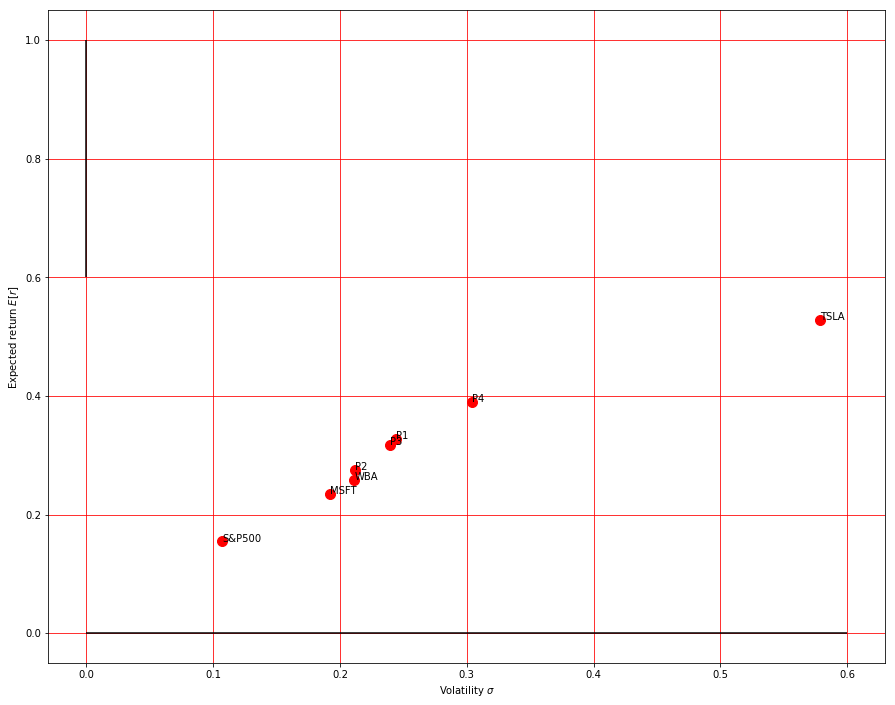

In [48]:
# Gráfico rendimiento esperado vs. volatilidad
import matplotlib.pyplot as plt
# Ventana para graficar
plt.figure(figsize=(15,12))
# Graficar puntos
plt.plot(x , y ,'ro',ms=10)
plt.plot(x_p , y_p ,'ro',ms=10)
plt.plot(SP500,SP5001, 'ro', ms=10)
plt.hlines(0,0,.6)
plt.vlines(0,1,.6)
plt.grid(color ='red')
# Etiquetas de los ejes
plt.xlabel('Volatility $\sigma$')
plt.ylabel('Expected return $E[r]$')
# Etiqueta de cada instrumento
plt.text(x[0],y[0],names[3])
plt.text(x[1],y[1],names[1])
plt.text(x[2],y[2],names[2])
plt.text(SP[0],SP[1], 'S&P500')
plt.text(x_p[0],y_p[0],'P1')
plt.text(x_p[1],y_p[1],'P2')
plt.text(x_p[2],y_p[2],'P3')
plt.text(x_p[3],y_p[3],'P4')


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>
<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>